# Clients Side Training

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn

In [3]:
df = pd.read_csv("C:\\Users\\arjun\\OneDrive\\Desktop\\BTP\\B.Tech-Project---Federated-Learning\\Project_file\\models\\feature_selected_voice_data.csv")

In [8]:
train_idx = int(len(df)*0.8)
test_idx = len(df) - train_idx

train_idx2 =  int(train_idx/2)
client1_dataset = df[:train_idx2]
client2_dataset = df[train_idx2:train_idx]

In [9]:
print(client1_dataset.shape)
print(client2_dataset.shape)
print(train_idx)
print(test_idx)

(1267, 14)
(1267, 14)
2534
634


In [4]:
# Client1 dataset -->
client1_X = client1_dataset.iloc[:,:-1]
client1_Y = client1_dataset["label"]
le = preprocessing.LabelEncoder()
client1_Y = le.fit_transform(client1_Y)
client1_X = client1_X.to_numpy()
# client1_Y = client1_Y.to_numpy()

X_train_1 = client1_X.astype('float32')
y_train_1 = client1_Y.astype('float32')

X_train_1 = torch.from_numpy(X_train_1)
y_train_1 =torch.from_numpy(y_train_1)

# Client2 Datatset -->
client2_X = client2_dataset.iloc[:,:-1]
client2_Y = client2_dataset["label"]
le = preprocessing.LabelEncoder()
client2_Y = le.fit_transform(client2_Y)
client2_X = client2_X.to_numpy()
# client2_Y = client2_Y.to_numpy()

X_train_2 = client2_X.astype('float32')
y_train_2 = client2_Y.astype('float32')

X_train_2 = torch.from_numpy(X_train_2)
y_train_2 =torch.from_numpy(y_train_2)

In [5]:
n_samples, n_features = X_train_1.shape

In [6]:
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    #sigmoid transformation of the input 
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [7]:
def clients_training(X_train, y_train, lr):
  num_epochs = 500
  learning_rate = 0.0001 
  criterion = nn.BCELoss() # Binary cross Entropy loss                              
  optimizer = torch.optim.SGD(lr.parameters(), lr=learning_rate) 
  error_loss = []
  for epoch in range(num_epochs):
      train_loss = 0
      optimizer.zero_grad()
      y_pred = lr(X_train)
      loss = criterion(y_pred.reshape(1584), y_train)             
      loss.backward()
      optimizer.step()
      # if (epoch+1) % 20 == 0:                                          
      #     print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')
      train_loss += loss.item()*X_train.size(0)
      train_loss = train_loss/1584
      error_loss.append(train_loss)
  total_loss = sum(error_loss)/len(error_loss)
  return lr.state_dict(), total_loss

#print(lr.parameters()) # printing learnable parameters (weights and biases)
#print(lr.state_dict) # pint dictionary of all parameters
# print(total_loss) # printing total loss in training the model

In [8]:
# weights, loss = clients_training(X_train_1, y_train_1)

# Server Side Training

In [9]:
import time
import copy
from copy import deepcopy
import matplotlib.pyplot as plt

Train 

In [10]:
def ss_train_r(model, rounds, plt_title="Loss Curve"):

  
  # global model weights
  global_weights = model.state_dict()

  # training loss
  train_loss = []

  # measure time
  start = time.time()


  for current_round in range(1, rounds+1):

    w, local_loss = [], []

    # model1 = LogisticRegression(n_features)
    weights1, loss1 = clients_training(X_train_1, y_train_1, model)

    # model2 = LogisticRegression(n_features)
    weights2, loss2 = clients_training(X_train_2, y_train_2, model)

    w.append(copy.deepcopy(weights1))
    w.append(copy.deepcopy(weights2))
    # print(loss1)
    # print(loss2)
    local_loss.append(copy.deepcopy(loss1))
    local_loss.append(copy.deepcopy(loss2))

    # updating the global weights
    weights_avg = copy.deepcopy(w[0])
    for k in weights_avg.keys():
      for i in range(1, len(w)):
        weights_avg[k] += w[i][k]

      weights_avg[k] = torch.div(weights_avg[k], len(w))
    global_weights = weights_avg

    # move the updated weights to our model state dict
    model.load_state_dict(global_weights)

    # loss
    loss_avg = sum(local_loss) / len(local_loss)
    print('Round: {}... \tAverage Loss: {}'.format(current_round, round(loss_avg, 3)))
    train_loss.append(loss_avg)

  plt.plot(train_loss)
  end = time.time()
  print("Training Done!")
  print("Total time taken to Train: {}".format(end-start))

  return model

Round: 1... 	Average Loss: 1.503
Round: 2... 	Average Loss: 0.145
Round: 3... 	Average Loss: 0.098
Round: 4... 	Average Loss: 0.075
Round: 5... 	Average Loss: 0.062
Round: 6... 	Average Loss: 0.053
Round: 7... 	Average Loss: 0.046
Round: 8... 	Average Loss: 0.041
Round: 9... 	Average Loss: 0.037
Round: 10... 	Average Loss: 0.034
Round: 11... 	Average Loss: 0.031
Round: 12... 	Average Loss: 0.029
Round: 13... 	Average Loss: 0.027
Round: 14... 	Average Loss: 0.025
Round: 15... 	Average Loss: 0.024
Round: 16... 	Average Loss: 0.023
Round: 17... 	Average Loss: 0.021
Round: 18... 	Average Loss: 0.02
Round: 19... 	Average Loss: 0.019
Round: 20... 	Average Loss: 0.019
Round: 21... 	Average Loss: 0.018
Round: 22... 	Average Loss: 0.017
Round: 23... 	Average Loss: 0.016
Round: 24... 	Average Loss: 0.016
Round: 25... 	Average Loss: 0.015
Round: 26... 	Average Loss: 0.015
Round: 27... 	Average Loss: 0.014
Round: 28... 	Average Loss: 0.014
Round: 29... 	Average Loss: 0.013
Round: 30... 	Average Lo

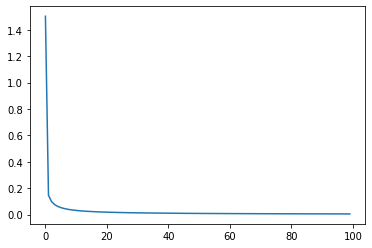

In [11]:
model = LogisticRegression(n_features)

if torch.cuda.is_available():
  model.cuda()

server_training = ss_train_r(model, 100,"Loss Curve")

# Training and Testing

In [35]:
def data_partition(dataset, clients):
  num_items_per_client = int(len(dataset)/clients)
  client_dict = {}
  image_idxs = [i for i in range(len(dataset))]

  for i in range(clients):
    client_dict[i] = set(np.random.choice(image_idxs, num_items_per_client, replace=False))
    image_idxs = list(set(image_idxs) - client_dict[i])

  return client_dict


In [36]:
import pandas as pd
import numpy as np

In [37]:
data = pd.read_csv("/content/feature_selected_voice_data.csv")

In [38]:
temp = data_partition(data, 2)

In [39]:
for key,value in temp.items():
	print(key, ':', value)

0 : {2, 3, 4, 5, 6, 9, 11, 13, 17, 19, 21, 22, 23, 27, 30, 31, 33, 34, 35, 36, 39, 43, 44, 45, 47, 49, 50, 53, 57, 63, 64, 65, 66, 67, 68, 70, 74, 75, 76, 82, 85, 86, 87, 88, 90, 92, 95, 96, 99, 100, 102, 103, 104, 106, 108, 109, 110, 111, 112, 114, 116, 117, 120, 125, 126, 127, 130, 131, 132, 134, 135, 136, 137, 138, 141, 145, 149, 151, 152, 155, 157, 161, 162, 163, 166, 168, 170, 173, 175, 177, 178, 179, 181, 182, 183, 184, 186, 188, 189, 190, 191, 197, 198, 200, 202, 203, 208, 210, 214, 215, 218, 219, 220, 224, 226, 229, 231, 234, 237, 238, 240, 243, 244, 245, 247, 250, 251, 253, 254, 255, 256, 258, 259, 261, 262, 268, 270, 271, 272, 273, 274, 275, 276, 277, 278, 280, 282, 284, 285, 286, 287, 288, 289, 290, 292, 293, 296, 297, 300, 302, 304, 306, 307, 308, 312, 315, 316, 317, 319, 320, 322, 323, 324, 326, 327, 328, 329, 330, 332, 334, 335, 336, 337, 340, 342, 344, 345, 349, 350, 356, 357, 358, 360, 364, 368, 370, 372, 373, 379, 382, 383, 385, 386, 388, 389, 390, 392, 395, 397, 399, 

In [40]:
from torch.utils.data import Dataset, DataLoader
from torch.utils.tensorboard import SummaryWriter
from torchvision import transforms, utils, datasets
from torchsummary import summary

In [54]:
class CustomDataset(Dataset):
  def __init__(self, dataset, idxs):
      self.dataset = dataset
      self.idxs = list(idxs)

  def __len__(self):
      return len(self.idxs)

  def __getitem__(self, item):
      X_train, y_train = self.dataset[self.idxs[item]]
      return X_train, y_train

In [56]:
train_loader = DataLoader(CustomDataset(data, temp[1]), batch_size=100, shuffle=True)


In [ ]:
for X_train, y_train in train_loader:
  if torch.cuda.is_available():
    X_train, y_train = X_train.cuda(), y_train.cuda()

In [45]:
# logistic regression class
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
    
    #sigmoid transformation of the input 
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [ ]:
Model_LR = LogisticRegression()

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [47]:
def train(model):
  for idxs in range(2):
    train_loader = DataLoader(CustomDataset(data, temp[0]), batch_size=100, shuffle=True)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=self.learning_rate, momentum=0.5)
    # optimizer = torch.optim.Adam(model.parameters(), lr=self.learning_rate)

    
    for X_train, y_train in train_loader:
      if torch.cuda.is_available():
        X_train, y_train = X_train.cuda(), y_train.cuda()

        
